In [1]:
from sklearn.datasets import load_boston


boston_dataset = load_boston()

import pandas as pd
df = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)

df['MEDV'] = boston_dataset.target[df.index]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
df.corr()["MEDV"].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

In [3]:
X = df["LSTAT"].values.reshape(-1, 1)
y = df["MEDV"].values.reshape(-1, 1)

In [4]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

In [5]:
# Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=100)

In [6]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

In [10]:
reg = svr_rbf.fit(X_train,y_train.reshape(-1))
y_train_hat = svr_rbf.predict(X_train)
y_test_hat = svr_rbf.predict(X_test)

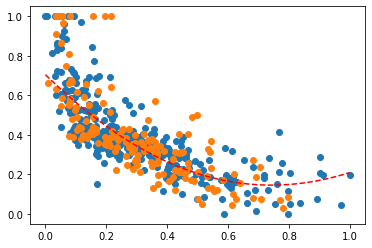

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

X_plot = np.linspace(0,1).reshape(-1, 1)
y_plot = svr_rbf.predict(X_plot)

plt.plot(X_plot, y_plot,"r--");

In [12]:
from sklearn.metrics import r2_score

print("Train", r2_score(y_train, y_train_hat))
print("Test", r2_score(y_test, y_test_hat))

Train 0.6549670658597964
Test 0.5959466433326346


In [13]:
# svr_lin
reg = svr_lin.fit(X_train,y_train.reshape(-1))

y_train_hat = svr_lin.predict(X_train)
y_test_hat = svr_lin.predict(X_test)

Train 0.5427835029461732
Test 0.5153691412881033


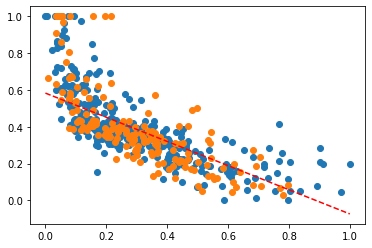

In [14]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

X_plot = np.linspace(0,1).reshape(-1, 1)
y_plot = svr_lin.predict(X_plot)

plt.plot(X_plot, y_plot,"r--")

print("Train", r2_score(y_train, y_train_hat))
print("Test", r2_score(y_test, y_test_hat))

In [17]:
# svr_poly
reg = svr_poly.fit(X_train,y_train.reshape(-1))

y_train_hat = svr_poly.predict(X_train)
y_test_hat = svr_poly.predict(X_test)

Entrenamiento 0.6807594509701385
Prueba 0.6128901480469988


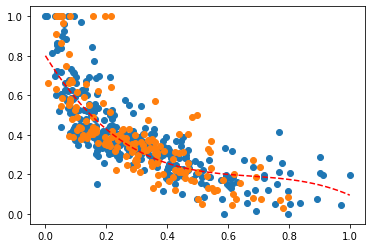

In [18]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

X_plot = np.linspace(0,1).reshape(-1, 1)
y_plot = svr_poly.predict(X_plot)

plt.plot(X_plot, y_plot,"r--")

print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

RBF Train 0.6549670658597964
RBF Test 0.5959466433326346
Linear Train 0.5427835029461732
Linear Test 0.5153691412881033
Poly Train 0.6807594509701385
Poly Test 0.6128901480469988


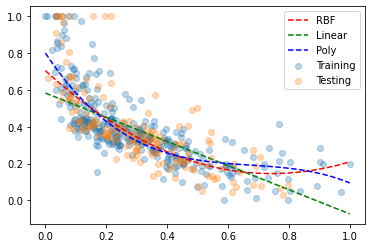

In [19]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)


plt.scatter(X_train, y_train,label="Training",alpha=0.3)
plt.scatter(X_test, y_test, label="Testing",alpha=0.3)

X_plot = np.linspace(0,1).reshape(-1, 1)
    
for name, svr, s in zip(["RBF","Linear","Poly"],[svr_rbf,svr_lin,svr_poly],["r--","g--","b--"]):
    svr.fit(X_train,y_train.reshape(-1))
    y_train_hat = svr.predict(X_train)
    y_test_hat = svr.predict(X_test)    
    # Con el modelo predecimos X_plot
    y_plot = svr.predict(X_plot)
    # Graficamos el modelo
    plt.plot(X_plot, y_plot, s,label=name)
    # Calculamos el error
    print(name, "Train", r2_score(y_train, y_train_hat))
    print(name, "Test", r2_score(y_test, y_test_hat))

plt.legend()

RBF Entrenamiento 0.6549670658597964
RBF Prueba 0.5959466433326346
----
Linear Entrenamiento 0.5427835029461732
Linear Prueba 0.5153691412881033
----
Poly Entrenamiento 0.6807594509701385
Poly Prueba 0.6128901480469988
----


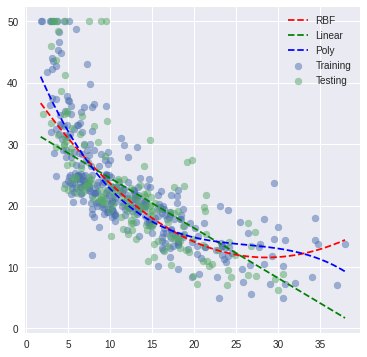

In [20]:
# Preparamos datos
X = df["LSTAT"].values.reshape(-1, 1)
y = df["MEDV"].values.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

# split de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=100)


from sklearn.svm import SVR
plt.style.use("seaborn")
plt.figure(figsize=(6,6))


svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

# scatter plot con los datos de entrenamiento
plt.scatter(X_scaler.inverse_transform(X_train), y_scaler.inverse_transform(y_train.reshape(-1,1)),label="Training",alpha=0.5)
# scatter plot con los datos de validación
plt.scatter(X_scaler.inverse_transform(X_test), y_scaler.inverse_transform(y_test.reshape(-1,1)),label="Testing",alpha=0.5)
# En X_plot guardamos valores distribuidos entre 0 y 1
X_plot = np.linspace(0,1).reshape(-1, 1)
    
for name, svr, s in zip(["RBF","Linear","Poly"],[svr_rbf,svr_lin,svr_poly],["r--","g--","b--"]):
    svr.fit(X_train,y_train.reshape(-1))
    y_train_hat = svr.predict(X_train)
    y_test_hat = svr.predict(X_test)    
    # Con el modelo predecimos X_plot
    y_plot = svr.predict(X_plot)
    # Graficamos el modelo
    plt.plot(X_scaler.inverse_transform(X_plot), y_scaler.inverse_transform(y_plot.reshape(-1,1)), s,label=name)
    # Calculamos el error
    print(name, "Entrenamiento", r2_score(y_train, y_train_hat))
    print(name, "Prueba", r2_score(y_test, y_test_hat))
    print("----")

plt.legend()